# Classification by logistic regression

Parameters have been extracted from the images and are going to be implemented into a clustering algorithm.

The images were skeletonised and a voronoi diagram was made using the branch points. Then parameters from the cells in the voronoi diagram were extracted.

Nodes: number of connecting branches
Verticies: number of points
Angular defect: 
iscoperimetric: ratio proportional to the area/perimeter^2
Number of polygons:
Average number of sides per polygon:


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

## Load and process data

In [59]:
# load data
data = pd.read_csv("voronoi_parameters/test.txt", sep=',', header=[0])

# remove names
files = data.loc[:, "file"] 
data = data.drop("file", axis=1)

In [60]:
# change all -1 values to 0 (for normalisation)
data = data.replace(-1, 0)
#display(data)
print(len(data.columns))
for index in range(len(data.columns)):
    data.iloc[:, index] = data.iloc[:, index]/data.iloc[:, index].max()
display(data)


6


,node,verticies,defect,ratio,# of polygons,# of sides
0,0.008518,0.008697,0.162376,0.910018,0.009295,0.935288
1,0.000315,0.000335,0.000000,0.132777,0.000620,0.539589
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.001010,0.001045,0.000000,0.794359,0.001363,0.766462
4,0.000883,0.000920,0.000000,0.773139,0.001239,0.741935
5,0.002461,0.002509,0.000000,0.737183,0.002850,0.879765
6,0.001514,0.001547,0.000000,0.472384,0.001859,0.831867
7,0.035967,0.036504,0.747697,0.432692,0.037799,0.965290
8,0.007635,0.007903,0.090559,0.625933,0.008675,0.910557
9,0.000126,0.000125,0.000000,0.000000,0.000372,0.337243


Index([' node', ' verticies', ' defect', ' ratio', ' # of polygons',
       ' # of sides'],
      dtype='object')


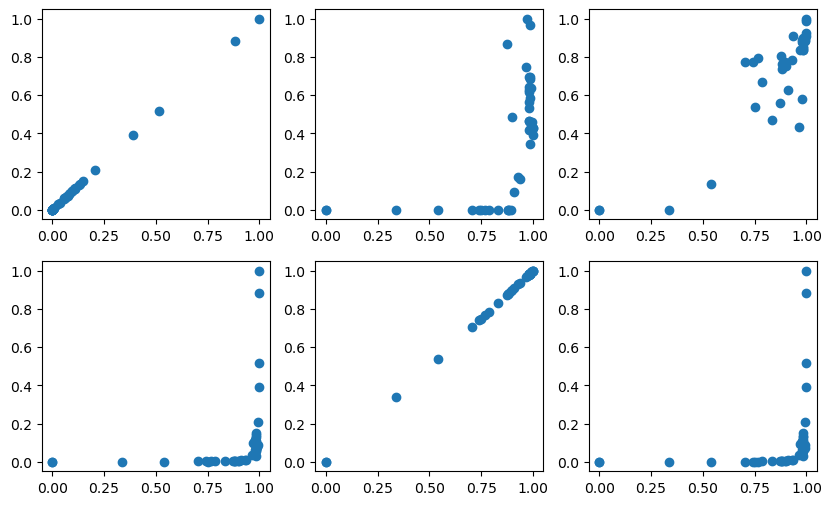

In [61]:
# visualise some of the data
# Create a figure with 6 subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
print(data.columns)

# Plot the data on each subplot
axs[0, 0].scatter(data[" node"], data[" verticies"])
axs[0, 1].scatter(data[" # of sides"], data[" defect"])
axs[0, 2].scatter(data[" # of sides"], data[" ratio"])
axs[1, 0].scatter(data[" # of sides"], data[" # of polygons"])
axs[1, 1].scatter(data[" # of sides"], data[" # of sides"])
axs[1, 2].scatter(data[" # of sides"],data[" node"])


In [62]:
#display(files)
conc_class = []
for index in range(len(data)):
    image = files.iloc[index]
    
    if ('OA' in image) or ('OB' in image) or ('OC' in image):
        conc_class.append(0)
    elif ('OD' in image) or ('OE' in image) or ('OF' in image):
        conc_class.append(1)
        
labeled_data = data
labeled_data["class"] = conc_class
display(labeled_data)

,node,verticies,defect,ratio,# of polygons,# of sides,class
0,0.008518,0.008697,0.162376,0.910018,0.009295,0.935288,0
1,0.000315,0.000335,0.000000,0.132777,0.000620,0.539589,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.001010,0.001045,0.000000,0.794359,0.001363,0.766462,0
4,0.000883,0.000920,0.000000,0.773139,0.001239,0.741935,0
5,0.002461,0.002509,0.000000,0.737183,0.002850,0.879765,0
6,0.001514,0.001547,0.000000,0.472384,0.001859,0.831867,0
7,0.035967,0.036504,0.747697,0.432692,0.037799,0.965290,0
8,0.007635,0.007903,0.090559,0.625933,0.008675,0.910557,0
9,0.000126,0.000125,0.000000,0.000000,0.000372,0.337243,0


In [63]:
print(labeled_data.columns)

Index([' node', ' verticies', ' defect', ' ratio', ' # of polygons',
       ' # of sides', 'class'],
      dtype='object')


## Prepare data for clustering algorithm

In [64]:
feature_names = [' node', ' verticies', ' defect', ' ratio', ' # of polygons', ' # of sides']
target_name=['class']


In [65]:
df_train = data.loc[:30, :]
df_test = data.loc[30:, :]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0    node           31 non-null     float64
 1    verticies      31 non-null     float64
 2    defect         31 non-null     float64
 3    ratio          31 non-null     float64
 4    # of polygons  31 non-null     float64
 5    # of sides     31 non-null     float64
 6   class           31 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 1.8 KB


In [66]:
features_train = df_train[feature_names]
label_train = df_train[target_name]

features_test = df_test[feature_names]
label_test = df_test[target_name]

features_train = features_train.values
features_test = features_test.values

## Make the linear regression model

In [67]:
# 1 neuron with no activation implies that the activation is linear
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(len(feature_names), ))
])

In [68]:
model.compile(optimizer='adam', loss='mse')
model.fit(features_train, label_train, epochs = 50)


Epoch 1/50
1/1 [==============================] - 1s 509ms/step - loss: 0.4080
Epoch 2/50
1/1 [==============================] - 0s 5ms/step - loss: 0.4058
Epoch 3/50
1/1 [==============================] - 0s 5ms/step - loss: 0.4036
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.4015
Epoch 5/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3994
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3972
Epoch 7/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3951
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3930
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 0.3910
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3889
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - loss: 0.3869
Epoch 12/50
1/1 [==============================] - 0s 4ms/step - loss: 0.3848
Epoch 13/50
1/1 [==============================] - 0s 4ms/step - loss: 

In [70]:
predictions = model.predict(features_test)
print(predictions)

1/1 [==============================] - 0s 45ms/step
[[0.96019816]
 [0.9514007 ]
 [0.83364904]
 [0.78872216]
 [0.72111857]
 [0.72598046]
 [0.8723046 ]
 [0.66638553]
 [0.7338581 ]
 [0.75290585]
 [0.8369733 ]
 [0.73804677]]


In [72]:
print(label_test)

    class
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
